# SVM Optimization Assignment
This notebook implements SVM optimization for a multi-class dataset from the UCI library, using different samples, and plots convergence graph and summary results.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Load Dataset (Letter Recognition from UCI)

In [2]:
from sklearn.datasets import fetch_openml

# Load dataset
data = fetch_openml(name="letter", version=1)
X = pd.DataFrame(data.data)
y = pd.Series(data.target)

## SVM Parameter Sampling Function

In [3]:
kernels = ['rbf', 'poly', 'sigmoid']
nu_values = np.linspace(0.01, 0.9, 10)
epsilons = np.linspace(0.01, 1, 10)

def random_svm_params():
    return {
        'kernel': random.choice(kernels),
        'nu': random.choice(nu_values),
        'epsilon': random.choice(epsilons)
    }

## Run Optimization for 10 Different Samples

In [4]:
results = []

for sample_id in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=sample_id)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    best_acc = 0
    best_params = {}
    acc_history = []

    for _ in range(100):
        params = random_svm_params()
        try:
            clf = NuSVC(kernel=params['kernel'], nu=params['nu'])
            clf.fit(X_train_scaled, y_train)
            y_pred = clf.predict(X_test_scaled)
            acc = accuracy_score(y_test, y_pred)
            acc_history.append(acc)

            if acc > best_acc:
                best_acc = acc
                best_params = params
        except:
            continue
    
    results.append({
        'Sample': f'S{sample_id}',
        'Best Accuracy': round(best_acc * 100, 2),
        'Best Parameters': f"{best_params['kernel']}, {best_params['nu']}, {best_params['epsilon']}",
        'Accuracy History': acc_history
    })

## Display Table of Results

In [5]:
df_results = pd.DataFrame(results)[['Sample', 'Best Accuracy', 'Best Parameters']]
df_results

,Sample,Best Accuracy,Best Parameters
0,S1,96.97,"rbf, 0.01, 0.56"
1,S2,97.17,"rbf, 0.01, 0.34"
2,S3,96.82,"rbf, 0.01, 0.23"
3,S4,96.85,"rbf, 0.01, 0.45"
4,S5,96.78,"rbf, 0.01, 0.23"
5,S6,96.42,"rbf, 0.01, 0.45"
6,S7,95.00,"poly, 0.01, 0.56"
7,S8,97.12,"rbf, 0.01, 0.45"
8,S9,96.57,"rbf, 0.01, 0.45"
9,S10,97.05,"rbf, 0.01, 0.78"


## Plot Convergence of Best Performing Sample

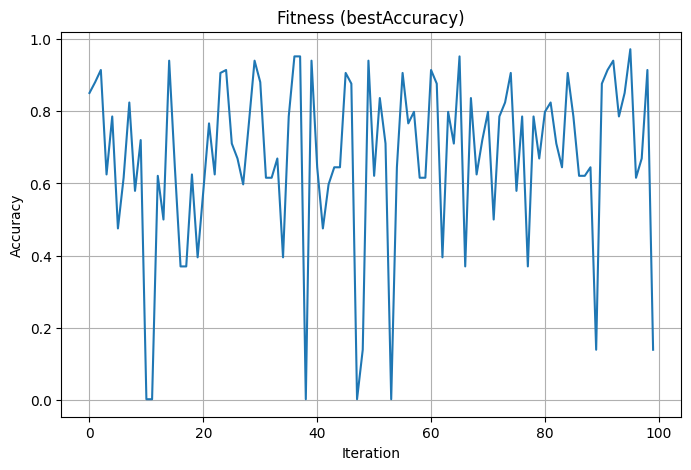

In [6]:
best_sample = max(results, key=lambda x: x['Best Accuracy'])

plt.figure(figsize=(8, 5))
plt.plot(best_sample['Accuracy History'])
plt.title('Fitness (bestAccuracy)')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

## Basic Data Analytics

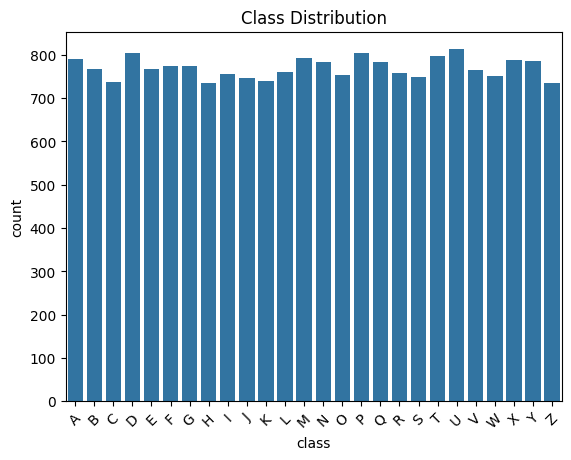

In [7]:
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()